In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [71]:
x_train = np.random.random(100)

In [72]:
x_train.shape[0]

100

In [73]:
y_train= 5.0e-1 * x_train + 8.0e-2

In [74]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
        
    total_cost= 1/ (2*m) * cost
    return total_cost

In [75]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    df_dw = 0
    df_db = 0
    
    for i in range(m):
        f_wb = w* x[i] + b
        
        df_dw_i = (f_wb - y[i])* x[i]
        df_db_i = (f_wb - y[i])
        
        df_dw+= df_dw_i
        df_db+= df_db_i
        
    
    return df_dw/m , df_db/m 
        
    


In [76]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha* dj_dw
        b = b - alpha* dj_db
        
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history
            

In [77]:
w_init = 1.0
b_init = 1.0

iterations = 10000

tmp_alpha = 3.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")




Iteration    0: Cost 6.64e-01  dj_dw:  6.893e-01, dj_db:  1.190e+00   w:  9.793e-01, b: 9.64299e-01
Iteration 1000: Cost 4.52e-07  dj_dw: -2.193e-04, dj_db:  1.275e-04   w:  4.969e-01, b: 8.17954e-02
Iteration 2000: Cost 6.42e-09  dj_dw: -2.613e-05, dj_db:  1.519e-05   w:  4.996e-01, b: 8.02139e-02
Iteration 3000: Cost 9.11e-11  dj_dw: -3.113e-06, dj_db:  1.809e-06   w:  5.000e-01, b: 8.00255e-02
Iteration 4000: Cost 1.29e-12  dj_dw: -3.709e-07, dj_db:  2.156e-07   w:  5.000e-01, b: 8.00030e-02
Iteration 5000: Cost 1.84e-14  dj_dw: -4.419e-08, dj_db:  2.569e-08   w:  5.000e-01, b: 8.00004e-02
Iteration 6000: Cost 2.61e-16  dj_dw: -5.266e-09, dj_db:  3.061e-09   w:  5.000e-01, b: 8.00000e-02
Iteration 7000: Cost 3.70e-18  dj_dw: -6.274e-10, dj_db:  3.647e-10   w:  5.000e-01, b: 8.00000e-02
Iteration 8000: Cost 5.25e-20  dj_dw: -7.476e-11, dj_db:  4.345e-11   w:  5.000e-01, b: 8.00000e-02
Iteration 9000: Cost 7.46e-22  dj_dw: -8.907e-12, dj_db:  5.177e-12   w:  5.000e-01, b: 8.00000e-02


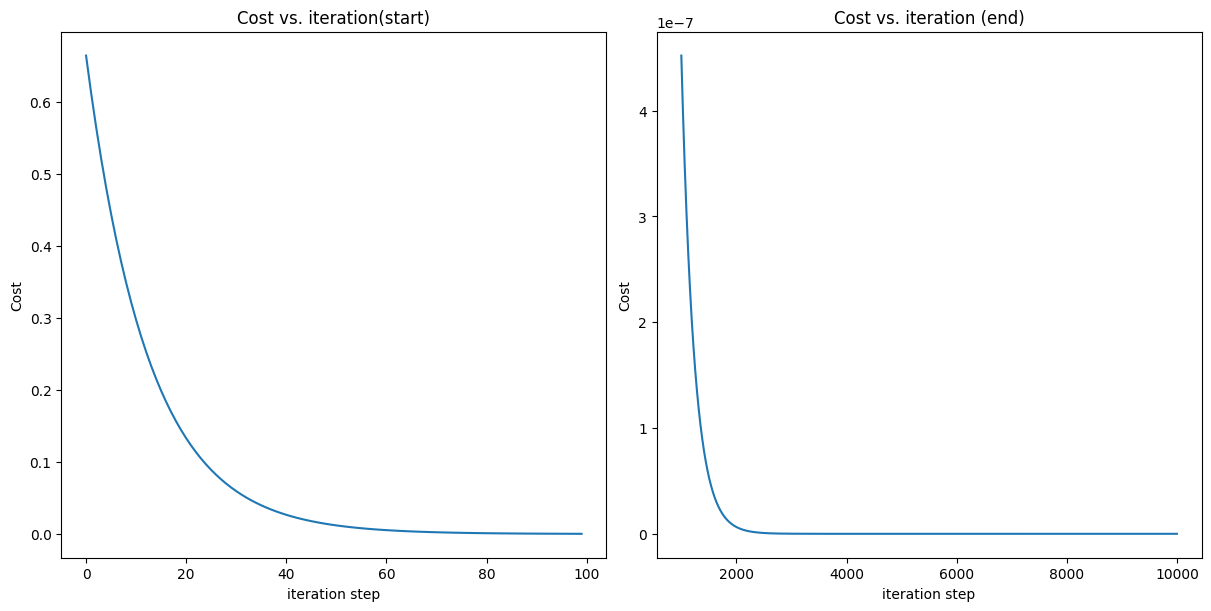

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize= (12, 6))

ax1.plot(J_hist[:100])
ax2.plot(1000+ np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predict x and test

In [87]:
def predict_x(x): 
     return round(w_final*x + b_final, 2)

In [88]:
x = 7.0

In [89]:
if  5.0e-1 * x + 8.0e-2 == predict_x(x):
    print(True)

True


In [84]:
5.0e-1 * 7.0 + 8.0e-2

3.58

In [86]:
round(w_final * x + b_final, 2)

np.float64(3.58)